# Crime data problem

Heirarchial clustering method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [3]:
crime = pd.read_csv('crime_data.csv')

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime1 = crime.rename({'Unnamed: 0' : 'Place'}, axis = 1)
crime1.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [39]:
crime1.isnull().sum()

Place        0
Murder       0
Assault      0
UrbanPop     0
Rape         0
clusterid    0
dtype: int64

In [ ]:
#Since this dataset will be used again twice for k means and DBSCAN respectively, one time EDA analysis should suffice.

In [6]:
crime2 = crime1.drop(['Place'], axis = 1)
crime2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
crime2_norm=pd.DataFrame(normalize(crime2),columns=crime2.columns)
crime2_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


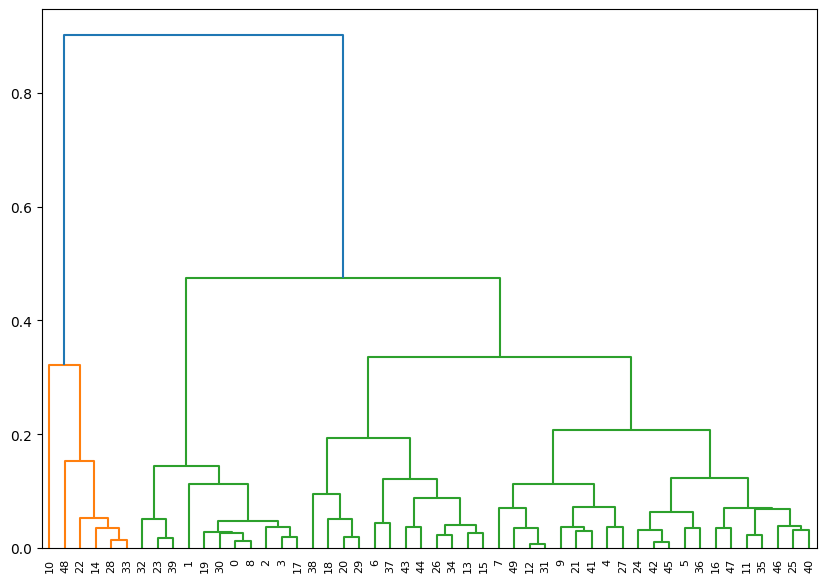

In [8]:
plt.figure(figsize=(10,7))
dendrograms=sch.dendrogram(sch.linkage(crime2_norm,'complete'))

In [ ]:
#Here we see that the dedrogram makes 2 main clusters so we go with the number of clusters as 2.

In [9]:
hclusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
hclusters

AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [10]:
y = pd.DataFrame(hclusters.fit_predict(crime2_norm), columns=['clusterid'])
y['clusterid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    44
1     6
Name: clusterid, dtype: int64

In [11]:
crime1['clusterid'] = hclusters.labels_
crime1.head()

,Place,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [ ]:
#Here we see that majority of the places came under cluster 0 as predicted by the agglomerative model.

With Kmeans clustering method

In [12]:
from sklearn.cluster import KMeans

In [13]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (1).csv


In [14]:
data = pd.read_csv('crime_data (1).csv')

In [15]:
data1 = data.rename({'Unnamed: 0' : 'Place'}, axis = 1)
data1.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
data2 = data1.drop(['Place'], axis = 1)
data2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [20]:
data2_sc = sc.fit_transform(data2)

In [21]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data2_sc)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

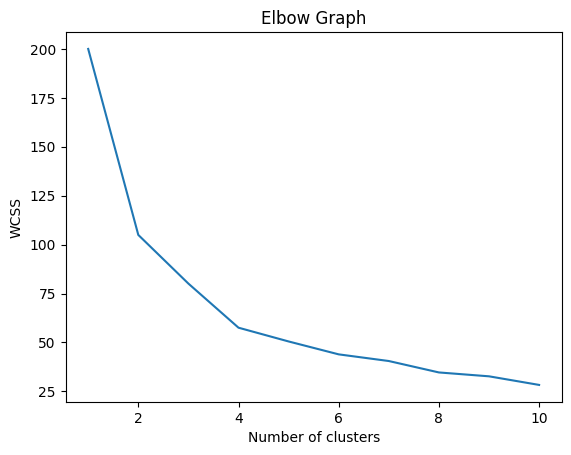

In [22]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Judging by the elbow graph theres a clear elbow at 4 clusters so we take the optimal number of clusters as 4

In [23]:
kmeans=KMeans(4,random_state=0).fit(data2_sc)
kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [24]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [26]:
data1['clusterid'] = kmeans.labels_
data1.head()

,Place,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [27]:
data1['clusterid'].value_counts()

0    16
1    13
2    13
3     8
Name: clusterid, dtype: int64

In [ ]:
#As we can see the highest number of places are placed in cluster 0 as predicted by the k means model.

By DBSCAN method

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data (2).csv


In [30]:
df = pd.read_csv('crime_data (2).csv')

In [31]:
df1 = df.rename({'Unnamed: 0' : 'Place'}, axis = 1)
df1.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [32]:
df2 = crime1.drop(['Place'], axis = 1)
df2.head()

,Murder,Assault,UrbanPop,Rape,clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [33]:
df2_sc = sc.fit_transform(df2)
df2_sc

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -0.36927447],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.36927447],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.36927447],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.36927447],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.36927447],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.36927447],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.36927447],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.36927447],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.36927447],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -0.36927447],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  2.7080128 ],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.36927447],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.36927447],
       [-0.13637203, -0.70012057, -0.0

In [34]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit_predict(df2_sc)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [35]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [37]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [38]:
cl.value_counts()

cluster
0          44
1           6
dtype: int64

In [ ]:
#As we can see, the DBSCAN model created 2 clusters with no outliers and majority of the places fall into cluster 0